 ### <font> <h1 align="center"> Music Genre Classification Project with PCA and Logistic Regression<h1> </font> 

## Data Exploration

In [1]:
import pandas as pd
import numpy as np
import scipy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('music_dataset_mod.csv')
data_copy = data.copy()
print(data.head())

        Tempo  Dynamics Range  Vocal Presence  Percussion Strength  \
0  114.618354       57.976367       53.251766            99.061840   
1  116.672803       69.387087       95.787280            90.831033   
2  128.328121       52.930677       65.701187           104.439247   
3  128.511337       25.494755       14.095374            40.106130   
4  135.474190       45.174876      101.469872            70.002203   

   String Instrument Detection  Electronic Element Presence  \
0                    14.686768                    17.628630   
1                    47.280419                   -15.618194   
2                     5.984994                    50.467388   
3                    47.715584                    87.335201   
4                   108.177637                    25.865590   

   Rhythm Complexity  Drums Influence  Distorted Guitar  Metal Frequencies  \
0          46.545522        75.839434         79.378892          71.753088   
1          85.421085       100.455908       

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), obj

In [4]:
data.isnull().sum()

Tempo                            0
Dynamics Range                   0
Vocal Presence                   0
Percussion Strength              0
String Instrument Detection      0
Electronic Element Presence      0
Rhythm Complexity                0
Drums Influence                  0
Distorted Guitar                 0
Metal Frequencies                0
Ambient Sound Influence          0
Instrumental Overlaps            0
Genre                          110
dtype: int64

In [5]:
genres = data['Genre'].unique()
print(f"Unique Genres: {genres}")

Unique Genres: ['Country' 'Classical' 'Rock' 'Hip-hop' nan 'Jazz']


In [6]:
num_genres = len(genres)
print(f"Number of unique genres: {num_genres}")

Number of unique genres: 6


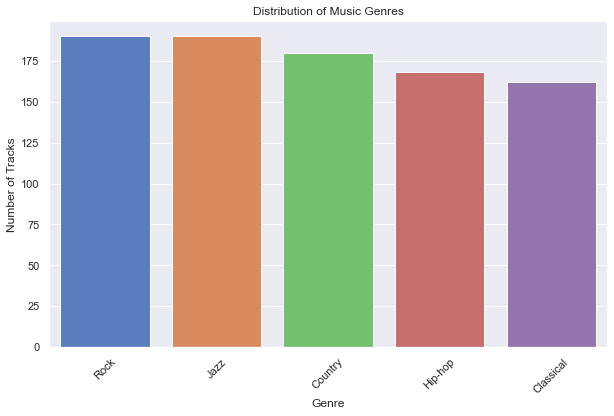

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of genres
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Genre', order=data['Genre'].value_counts().index, palette='muted')
plt.title('Distribution of Music Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.show()


The distribution of music genres shown in the graph is somewhat imbalanced. The "Pop" genre has the highest number of tracks, while the "Classical" genre has the lowest. The other genres like "Jazz", "Country", and "Hip-hop" fall in the middle range.

## Correlation Analysis

In [8]:
cleaned_data = data.copy()
cleaned_data = cleaned_data.dropna(subset=['Genre'])
cleaned_data

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,133.807084,43.093084,88.711355,38.195402,25.365896,87.613700,74.603838,87.775499,28.055663,19.389458,74.576379,59.205448,Hip-hop
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock


In [9]:
# Define features and target
X = cleaned_data.drop(columns=['Genre'])  # Drop the target column
y = cleaned_data['Genre']  # Extract the target column

In [10]:
#Transform the categorical Genre column into numeric values using LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Encode the Genre column
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Replace the original Genre column with the encoded values
cleaned_data['Genre_encoded'] = y_encoded
y_encoded

array([1, 0, 4, 2, 1, 4, 2, 1, 1, 1, 0, 2, 2, 4, 2, 4, 3, 0, 4, 2, 1, 0,
       1, 3, 3, 4, 3, 4, 2, 1, 4, 1, 4, 0, 0, 3, 0, 3, 4, 0, 3, 1, 3, 1,
       2, 1, 4, 1, 4, 0, 1, 1, 0, 3, 2, 4, 4, 1, 2, 0, 1, 1, 0, 3, 1, 3,
       4, 2, 2, 3, 0, 2, 1, 3, 2, 2, 0, 2, 3, 1, 0, 4, 3, 2, 0, 2, 3, 1,
       1, 0, 4, 1, 3, 2, 3, 4, 1, 1, 4, 0, 0, 1, 3, 3, 4, 4, 2, 0, 0, 1,
       3, 4, 3, 2, 3, 1, 0, 2, 1, 0, 2, 4, 4, 3, 1, 2, 4, 1, 2, 1, 2, 1,
       0, 2, 1, 2, 4, 3, 2, 1, 3, 1, 4, 1, 0, 1, 2, 2, 2, 1, 1, 2, 3, 4,
       1, 2, 2, 4, 4, 2, 0, 3, 4, 4, 1, 4, 1, 2, 3, 0, 3, 4, 4, 4, 3, 0,
       4, 0, 4, 3, 3, 2, 3, 4, 0, 1, 1, 4, 3, 2, 1, 1, 3, 2, 4, 1, 0, 2,
       1, 4, 0, 2, 2, 4, 0, 2, 3, 0, 0, 2, 4, 2, 3, 3, 4, 2, 3, 1, 1, 0,
       3, 2, 4, 3, 2, 3, 1, 4, 3, 3, 0, 3, 4, 3, 0, 4, 4, 3, 1, 1, 4, 0,
       3, 2, 3, 3, 1, 0, 3, 1, 3, 4, 3, 3, 2, 1, 3, 2, 0, 4, 4, 1, 3, 2,
       3, 4, 1, 3, 4, 3, 1, 0, 4, 3, 0, 2, 2, 0, 4, 2, 4, 2, 1, 1, 0, 3,
       2, 4, 2, 1, 3, 4, 1, 2, 0, 4, 2, 4, 3, 3, 4,

In [11]:
#Update the DataFrame by replacing the categorical Genre column with its encoded version

updated_data = cleaned_data.drop(columns=['Genre']) # Drop the original Genre column
updated_data['Genre'] = cleaned_data['Genre_encoded'] # Include the encoded target column
updated_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        890 non-null    float64
 1   Dynamics Range               890 non-null    float64
 2   Vocal Presence               890 non-null    float64
 3   Percussion Strength          890 non-null    float64
 4   String Instrument Detection  890 non-null    float64
 5   Electronic Element Presence  890 non-null    float64
 6   Rhythm Complexity            890 non-null    float64
 7   Drums Influence              890 non-null    float64
 8   Distorted Guitar             890 non-null    float64
 9   Metal Frequencies            890 non-null    float64
 10  Ambient Sound Influence      890 non-null    float64
 11  Instrumental Overlaps        890 non-null    float64
 12  Genre_encoded                890 non-null    int32  
 13  Genre               

In [12]:
correlation_matrix = updated_data.corr()

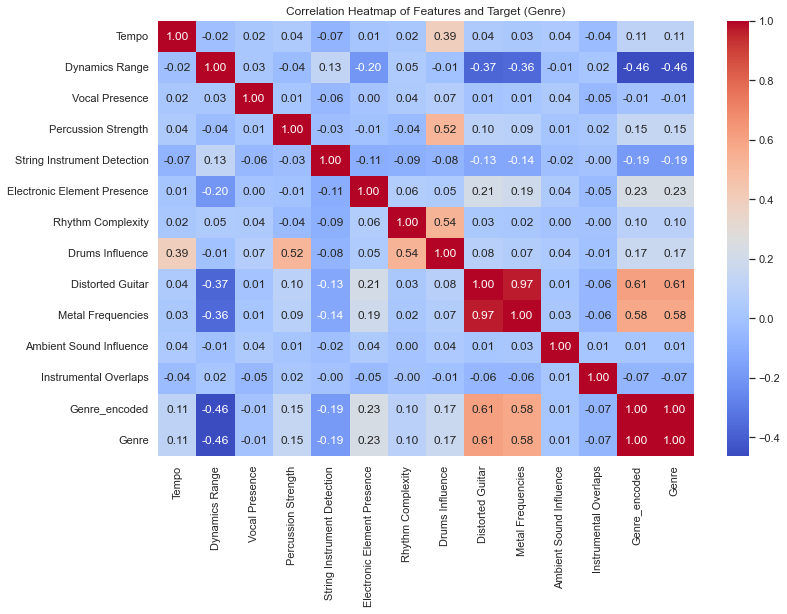

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title('Correlation Heatmap of Features and Target (Genre)')
plt.show()

-Dynamics Range has a moderate negative correlation (-0.46) with the target "Genre". This suggests it could be a useful feature for genre classification.<br>
-A strong positive correlation with Distorted Guitar (0.61). This implies that tracks with higher values for distorted guitar frequencies are more likely to belong to certain genres, likely rock, metal, or similar styles.<br>
-Another strong positive correlation with Metal Frequencies (0.58). This indicates that tracks with higher metal frequency values are associated with certain genres, likely heavy metal or genres with overlapping characteristics.

## PCA for Dimensionality Reduction

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()

X_pca = pca.fit_transform(X_scaled)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Display the explained variance for each component
print("Explained Variance Ratio for each component:")
print(explained_variance_ratio)

Explained Variance Ratio for each component:
[0.20063071 0.15062807 0.09369199 0.08696907 0.08536054 0.08167379
 0.07948271 0.07613474 0.07000221 0.05996203 0.01267309 0.00279105]


In [15]:
# Reapply PCA with 8 components
pca = PCA(n_components=8)
X_reduced = pca.fit_transform(X_scaled)

# Display the transformed data shape
print("Shape of the data after PCA:", X_reduced.shape)

# Display explained variance ratio for the chosen components
explained_variance = pca.explained_variance_ratio_
cumulative_variance = sum(explained_variance)
print(f"Explained Variance Ratio for each of the 8 components:\n{explained_variance}")
print(f"Cumulative Variance explained by 8 components: {cumulative_variance:.2f}")

Shape of the data after PCA: (890, 8)
Explained Variance Ratio for each of the 8 components:
[0.20063071 0.15062807 0.09369199 0.08696907 0.08536054 0.08167379
 0.07948271 0.07613474]
Cumulative Variance explained by 8 components: 0.85


## Evaluating Classification Efficacy – PCA-Transformed vs. Original Data

In [16]:
# Assuming X_reduced is the PCA-transformed data and y_encoded is the target variable
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_reduced, y_encoded, test_size=0.3, random_state=42)
# Create and fit the Logistic Regression model on PCA-transformed data
logreg_pca = LogisticRegression(max_iter=10000, random_state=42)
logreg_pca.fit(X_train_pca, y_train_pca)

# Predict on the test set
y_pred_pca = logreg_pca.predict(X_test_pca)

# Evaluate the model's performance
accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)
print(f"Accuracy on PCA-transformed data: {accuracy_pca:.2f}")

# Generate a classification report
print("Classification Report (PCA-transformed data):")
print(classification_report(y_test_pca, y_pred_pca))

Accuracy on PCA-transformed data: 0.54
Classification Report (PCA-transformed data):
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        51
           1       0.32      0.23      0.27        52
           2       0.49      0.44      0.46        48
           3       0.41      0.42      0.42        62
           4       0.51      0.63      0.56        54

    accuracy                           0.54       267
   macro avg       0.52      0.54      0.53       267
weighted avg       0.52      0.54      0.52       267



In [17]:
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

# Create and fit the Logistic Regression model on original data
logreg_original = LogisticRegression(max_iter=10000, random_state=42)
logreg_original.fit(X_train_original, y_train_original)

# Predict on the test set
y_pred_original = logreg_original.predict(X_test_original)

# Evaluate the model's performance
accuracy_original = accuracy_score(y_test_original, y_pred_original)
print(f"Accuracy on original data: {accuracy_original:.2f}")

# Generate a classification report
print("Classification Report (Original data):")
print(classification_report(y_test_original, y_pred_original))

Accuracy on original data: 0.53
Classification Report (Original data):
              precision    recall  f1-score   support

           0       0.86      0.98      0.92        51
           1       0.33      0.25      0.28        52
           2       0.45      0.46      0.45        48
           3       0.44      0.39      0.41        62
           4       0.49      0.59      0.54        54

    accuracy                           0.53       267
   macro avg       0.51      0.53      0.52       267
weighted avg       0.51      0.53      0.52       267



## Genre Prediction and Integration

In [18]:
# Identify rows where the Genre is missing
missing_genre_rows = data[data['Genre'].isnull()].copy()
missing_genre_rows

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
13,104.389822,65.826509,45.855410,55.655533,76.058845,55.625315,25.312585,59.202818,0.920308,0.000000,94.308889,27.441046,NaN
18,101.367152,47.843370,93.230347,67.101777,20.932163,50.772288,30.348312,62.950165,64.462755,68.971944,21.690071,94.717315,NaN
22,85.130539,55.707108,81.149615,21.473425,14.959208,61.017283,64.000152,43.332846,70.455879,79.053598,20.420619,99.499498,NaN
31,121.100952,71.769727,49.609529,82.539647,47.670106,119.460607,68.812707,83.727876,95.307620,95.779062,2.883916,19.230684,NaN
42,93.546825,44.563761,56.587554,99.546134,109.735122,30.128106,48.392807,81.888793,97.200948,100.000000,16.380240,55.483399,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,130.719110,65.990957,21.775950,91.817048,34.029452,105.525736,28.552899,99.587397,1.414556,0.000000,59.447447,74.901837,NaN
992,117.892313,35.001524,76.506358,77.972570,80.765657,13.759213,59.985923,80.108786,93.831262,100.000000,15.851851,47.984445,NaN
993,104.315096,26.173723,3.334345,42.132602,38.434513,66.522798,62.051560,79.475348,61.390214,52.925363,50.383816,52.630256,NaN
994,121.863373,50.872678,70.100162,106.212013,66.573813,89.927526,3.009635,79.634816,15.398297,31.235519,11.997421,57.281283,NaN


In [19]:
X_missing = missing_genre_rows.drop(columns=['Genre'])

In [20]:
# Extract features from these rows (excluding the Genre column)
X_missing = missing_genre_rows.drop(columns=['Genre'])

In [21]:
# Standardize the features
X_missing_scaled = scaler.transform(X_missing)  # Using the same scaler instance used for the training data

# Apply PCA transformation
X_missing_pca = pca.transform(X_missing_scaled)  # Using the trained PCA 

In [22]:
# Predict the genres

y_missing_pred = logreg_pca.predict(X_missing_pca) 
y_missing_pred

array([0, 1, 1, 4, 4, 3, 3, 3, 4, 3, 3, 2, 4, 3, 4, 1, 4, 3, 2, 4, 2, 4,
       0, 3, 1, 3, 0, 2, 0, 3, 0, 1, 3, 4, 4, 4, 1, 0, 2, 1, 3, 0, 0, 1,
       4, 1, 2, 3, 0, 3, 1, 3, 0, 1, 4, 1, 2, 4, 1, 3, 2, 0, 0, 0, 1, 4,
       3, 0, 1, 1, 3, 1, 3, 4, 0, 4, 3, 3, 1, 1, 3, 0, 4, 0, 0, 4, 0, 1,
       2, 4, 0, 4, 4, 0, 4, 4, 0, 1, 0, 3, 2, 3, 2, 4, 3, 2, 4, 2, 2, 0])

In [23]:
# Assign the predicted genres back to the DataFrame
missing_genre_rows.loc[:, 'Predicted_Genre'] = label_encoder.inverse_transform(y_missing_pred)
# Display the DataFrame with predicted genres
print(missing_genre_rows[['Predicted_Genre']])

    Predicted_Genre
13        Classical
18          Country
22          Country
31             Rock
42             Rock
..              ...
991         Hip-hop
992            Rock
993         Hip-hop
994         Hip-hop
995       Classical

[110 rows x 1 columns]


In [24]:
# Assign the predicted genres to the original DataFrame's missing values
data.loc[data['Genre'].isna(), 'Genre'] = missing_genre_rows['Predicted_Genre'].values

data

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,66.578839,54.533872,99.782246,95.633310,91.414514,19.396142,36.280860,78.298955,4.890606,4.638077,75.479656,95.990077,Classical
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock


In [25]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        1000 non-null   object 
dtypes: float64(12), obj